# Investigating Fandango movie ratings that are believed to be skewed

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

# Importing the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fandango_ratings = pd.read_csv("fandango_score_comparison.csv")

movie_1617 = pd.read_csv("movie_ratings_16_17.csv")


In [17]:
hicky_columns = fandango_ratings[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]


dataquest_columns = movie_1617[["movie", "year","fandango"]] 
hicky_columns.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


The population of interest is the movies released in 2015,2016 and 2017. 

the fandango 2015 is every film that has a RT rating, metacritic score, and IMDB score.

the 2016,2017 sample is not random because it takes the most popular movies




# Are the datasets we have good enough for the analysis?

the critera for the fandango csv are movies that where released in 2015 that has a RT score, Metacritic score, IMDB score and at least 30 Fandango fan reviews. This means that the sample of the population is not random. Only the popular moives are taken into account. 

Aswell, The second dataset is also not a random population. This dataset involves movies that where released in 2015 and 2016. Also, these are what are considered the 214 most popular movies realeased (with significant number of votes).

Our original hypothessis cannot be tested because the population for the first dataset is not random (0nly the most popular movies) and it only has fandango score for movies in 2015. It could be that 2015 was a year was an outliar and more highly rated movies came out than average. Likewise the second data set is also not a random sample of the population. It only lists the most popular movies in 2015 and 2016. 

# Changing the goal of the analysis

We will use the same data but we will slightly change the goal of our analysis. Our new goal is to check if therer is a difference between fandangos ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

"Popular" movies is vaugly defined in both data sets. However, we will define popular as movies that have at least 30 Fandango fan reviews. On the first 2015 dataset, all listed movies have at least 30 Fandango fan reviews. However, the 2016 dataset does not list if all movies will have at leasts 30 fan reviews. We will check this. 


In [19]:
import pandas as pd
import statistics 


dataquest_columns.sample(10,random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


When you check this random sample in the Fandango database you will see that 90% of movies have over 30 ran reviews.

In [20]:
hicky_columns["year"] = hicky_columns["FILM"].str[-5:-1]
hicky_columns.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [21]:
fandango_2015 = hicky_columns[hicky_columns["year"] == "2015"]

a =fandango_2015.head()
a

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [22]:
fandango_2016 = dataquest_columns[dataquest_columns["year"] == 2016]

fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


# Our Analysis


We are finally able to analyze our data. We are plotting the ratings of the 2015 and 2016 fandango ratings. We are comparing the the frequency of the ratings between the two years. 

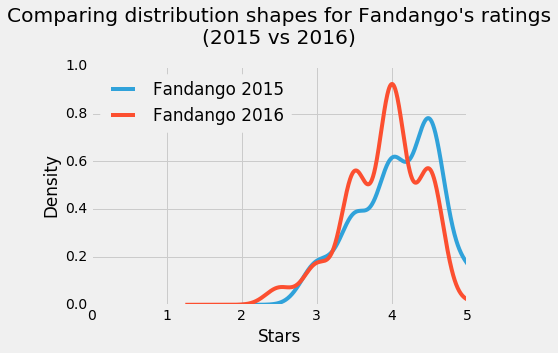

In [28]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label = 'Fandango 2015', legend = True)
fandango_2016["fandango"].plot.kde(label = 'Fandango 2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
#plt.xticks(arange(0,5.1,.5))
plt.show()


From the grapgh above we can see that there is a significant difference between the distributions between the 2015 and 2016 Fandango scores. The peak of the 2016 ratings is at 4 while the peak of 2015 ratings is at 4.5. This could mean that the ratings system that Fandango uses could have changed after Hicky's report.

The shapes of the distrubitions are different. The ratings of the 2016 data falls of more gradually after the peark compared with the 2015 data. 



# Frequency Tables

When analyzeing the frequency tables we realize that there are a different amount of movies in each data set. Therefore we can normalized the results in order for us to get a better sense of the data. 

In [29]:
freq_2015 =fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index()*100
freq_2015

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [30]:
freq_2016 =fandango_2016["fandango"].value_counts(normalize = True).sort_index()*100
freq_2016

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Comparing the frequency tables we see that there is a clear difference between the distributions. We see that the highest percentage for the 2015 data is at a 4.5 ratings compared with a 4.0 rating for the 2016 data. This is inline with our initial observation from the kernal density plot. 

In [76]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
median_2015 = fandango_2015["Fandango_Stars"].median()
mode_2015 = float(fandango_2015["Fandango_Stars"].mode()[0])

In [77]:
summary = pd.DataFrame()


mean_2016 = fandango_2016["fandango"].mean()
median_2016 = fandango_2016["fandango"].median()
mode_2016 = fandango_2016["fandango"].mode()[0]

In [78]:
mean_difference = abs(mean_2016 - mean_2015)
median_difference = abs(median_2016 - median_2015)
mode_difference = abs(mode_2016 - mode_2015)

summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean", "median","mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


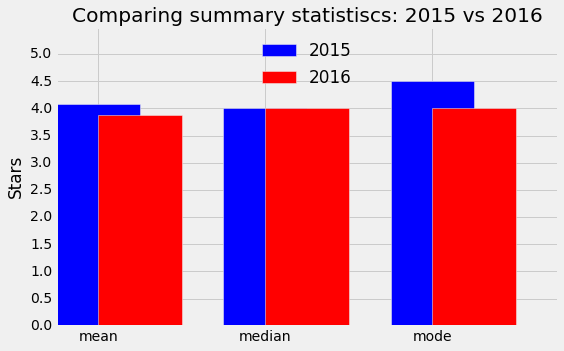

In [87]:
plt.style.use('fivethirtyeight')

summary["2015"].plot.bar(color = 'b')
summary["2016"].plot.bar(color = 'r', align = "edge", rot = 0, figsize = (8,5))

plt.title("Comparing summary statistiscs: 2015 vs 2016")
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


mean mean, and mode again show that the ratings in 2016 are slighlty lower than they were in 2015. 

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.